In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random

In [60]:
data = pd.read_csv("../datasets/nb/train.csv")
data.shape

(42000, 785)

In [61]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
X = data.drop(columns='label')
y = data['label']

X = np.clip(X,0,1)

X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=42,test_size=0.20, shuffle=True)

In [ ]:
def train(x,y):

    # Stores P(pixel_i = 1 | class) for each class and each pixel
    likelihood = []

    classes = len(np.unique(y))

    for class_label in range(classes):

        #subset of all data
        occurences = x[y == class_label]

        #calculate on prob
        prob = occurences.sum(axis=0) / occurences.shape[0]
        likelihood.append(prob)

    likelihood = np.array(likelihood)

    # P(class = c)
    class_probabilities = []
    for class_label in range(classes):
        class_probability = np.mean(y == class_label)
        class_probabilities.append(class_probability)

    class_probabilities = np.array(class_probabilities)

    return likelihood , class_probabilities

        
    

def predict(image,model):
    likelihood , class_probabilties = model

    probabilities = []

    for class_label, (pixel_probs, class_prior) in enumerate(zip(likelihood, class_probabilties)):

        prob_pixel_on = pixel_probs[image == 1]

        #select pixels that are off then 1 - prob = off
        prob_pixel_off = 1 - pixel_probs[image == 0]
        
        # Bernoulli probability 
        likelihood = np.prod(prob_pixel_on) * np.prod(prob_pixel_off)
        posterior = likelihood * class_prior
        
        probabilities.append(posterior)

    predicted_class = np.argmax(probabilities)
    
    return predicted_class
        
    
    

In [75]:
model = train(X_train,y_train)

3316 784 (3316, 784)
3775 784 (3775, 784)
3331 784 (3331, 784)
3414 784 (3414, 784)
3233 784 (3233, 784)
3093 784 (3093, 784)
3352 784 (3352, 784)
3508 784 (3508, 784)
3228 784 (3228, 784)
3350 784 (3350, 784)


In [65]:
y_pred = []

for idx , image in X_test.iterrows():
    y_pred.append(predict(image,model))

print('Accuracy of NB is', accuracy_score(y_test, y_pred)*100,'%')

Accuracy of NB is 83.05952380952381 %


True label: 5 predicted: 5


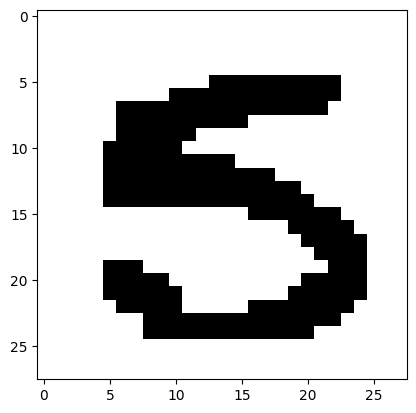

In [66]:
id = random.randint(0, len(X_test) - 1) 
B = X_test.iloc[id].values  
B = np.reshape(B, (28, 28))  


print('True label:',y_test.iloc[id], 'predicted:', y_pred[id])
plt.imshow(B, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
